In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# set to one to run the tests in the notebook
%env TEST_RUN=

env: TEST_RUN=


An alchemical model for high-entropy alloys.
============================================

This example shows how to train a potential that can model the energetics of bulk phases containing up to 25 transition metals.  The potential uses atom-centered correlation features: it first describes the neighborhood $A_i$ of each atom in the system in terms of the density of its neighbors, and then computes symmetrized tensor products of this density to obtain an invariant basis to express the functional relation between a structure and its energy, 

$$
E(A) = \sum_i E(A_i) 
$$

Each element yields a separate channel in the neighbor density, which translates in a steep increase of memory and computational requirements as one computes correlation functions of a many-element system: two-neighbor correlations require $n_species^2$ entries, and so on.

An alchemical compression scheme cf. [Willat et al, PCCP (2018)](https://doi.org/10.1039/c8cp05921g) avoids this problem by projecting the neighbor density on a lower-dimensional space of "pseudo-elements". 

## Preparation

Make sure you install the packages listed in `requirements.txt`. These are pinned to very specific versions of these codes: there is no guarantee that this example will work with more recent versions of these packages. Furthermore, you should separately clone the `alchemical-learning` repository. 

```
git clone git@github.com:Luthaf/alchemical-learning.git
```

In [11]:
%%script bash --no-raise-error
if [ -z $TEST_RUN ]; then exit; fi
git clone git@github.com:Luthaf/alchemical-learning.git

## Training the potential

You can fetch a data file containing approximately 25'000 configurations (including distorted _fcc_ and _bcc_ structures with up to 25 elements) from a
** public repository **

```
wget https://www.dropbox.com/s/9jzgn2r76rmb588/data_shuffle_final.xyz?dl=1
``` 

In [12]:
%%script bash 
if [ -z $TEST_RUN ]; then exit; fi
wget https://www.dropbox.com/s/9jzgn2r76rmb588/data_shuffle_final.xyz?dl=1 -O data_shuffle_final.xyz

** explain how to run the training ** 

Text(0, 0.5, 'DFT energy / eV')

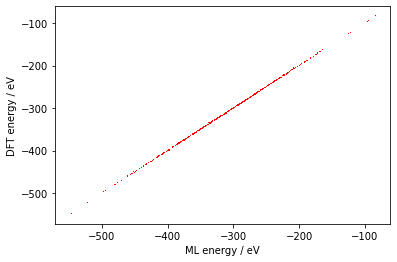

In [13]:
test_energies = np.loadtxt('reference_data/potential/energy_test.dat')
plt.plot(test_energies[:,0], test_energies[:,1], 'r,')
plt.xlabel('ML energy / eV')
plt.ylabel('DFT energy / eV')

In [14]:
%%script bash
if [ -z $TEST_RUN ]; then exit; fi
python alchemical-learning/fit-alchemical-potential.py test_data/test_data.xyz test_data/train-test_model.json

## Simulating segregation in a Cantor-style equimolar high-entropy alloy

In [15]:
%%script bash
if [ -z $TEST_RUN ]; then exit; fi
i-pi test_data/test_ipi.xml &
sleep 4
i-pi-py_driver -a hea_ipi_test -u -m alchemical -o reference_data/potential/best.torch,reference_data/potential/parameters.json,all-hea-125.extxyz &
i-pi-py_driver -a hea_ipi_test -u -m alchemical -o reference_data/potential/best.torch,reference_data/potential/parameters.json,all-hea-125.extxyz &
wait

In [18]:
# programmatically skip execution of this cell
import os
if os.environ.get('TEST_RUN'):
    dfadfa

ciao
